In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [65]:
data_df = pd.read_csv("Classified Data",index_col=0)
data_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [66]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [79]:
# StandardScaler



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a=scaler.fit(data_df.drop("TARGET CLASS",axis=1))

scaled_feature = scaler.transform(data_df.drop("TARGET CLASS",axis=1))
X = pd.DataFrame(scaled_feature,columns=data_df.columns[:-1])
y= data_df["TARGET CLASS"]


# Issues with This Approach
# No Train-Test Split: If you fit and transform the entire dataset (data_df), you include both the 
# training data and the target variable in the scaling. This can lead to data leakage, as the model 
# would have already seen information from the test set when scaling.
# Recommended Approach
# Here’s how you can correctly use StandardScaler in conjunction with a train-test split:

# Split the Data: First, separate your features from the target variable and then split into training and test sets.
# Fit and Transform on Training Data: Fit the scaler on the training data only.
# Transform Both Sets: Transform the training and test sets using the fitted scaler.


# fit(): Calculates and stores the scaling parameters (mean and standard deviation).
# transform(): Applies the scaling to the data based on the parameters calculated during fit().
# fit_transform(): Combines both actions in one step for convenience, but should only be used on training data.





# # Sample dataset
# data = pd.DataFrame({
#     'feature1': [1, 2, 3, 4, 5],
#     'feature2': [10, 20, 30, 40, 50],
#     'target': [1, 0, 1, 0, 1]
# })

# # Separate features and target
# X = data[['feature1', 'feature2']]
# y = data['target']

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize StandardScaler
# scaler = StandardScaler()

# # Fit the scaler only on the training data
# scaler.fit(X_train)

# # Transform both the training and test sets
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Convert to DataFrame for better readability (optional)
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# # Output the scaled data
# print("Scaled Training Data:\n", X_train_scaled_df)
# print("\nScaled Test Data:\n", X_test_scaled_df)


In [104]:
# now we have to split the dataset into train and test 
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)

In [105]:
# now train the model 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [106]:
y_pred = knn_model.predict(X_test)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       173
           1       0.95      0.89      0.92       157

    accuracy                           0.92       330
   macro avg       0.93      0.92      0.92       330
weighted avg       0.93      0.92      0.92       330



In [108]:
print(confusion_matrix(y_test,y_pred))

[[165   8]
 [ 17 140]]


In [125]:
# find the best value of k 

In [111]:
error_rate = []

for value in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=value)
    knn_model.fit(X_train,y_train)
    y_pred= knn_model.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

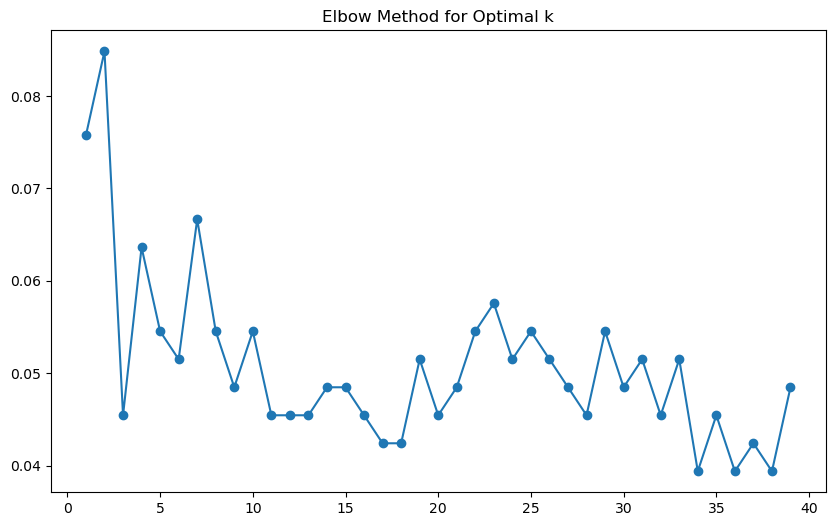

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,40), error_rate, marker='o')
plt.title('Elbow Method for Optimal k')
plt.show()

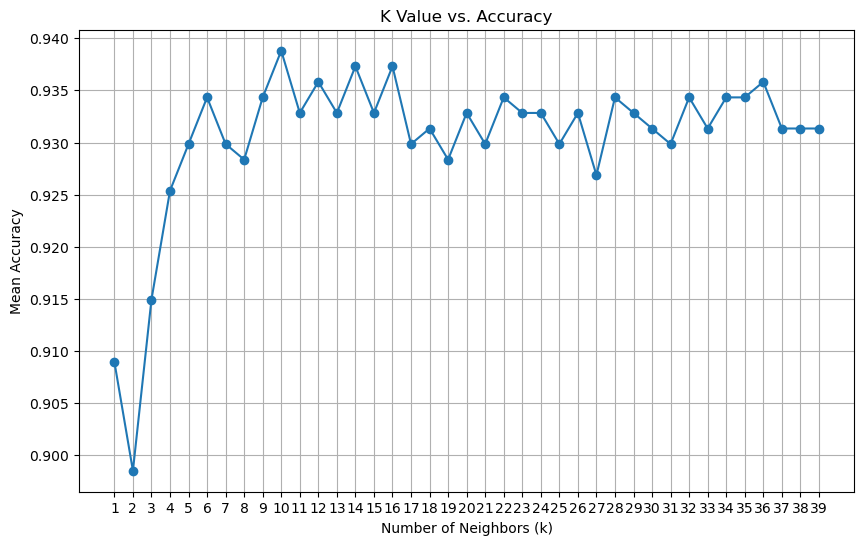

The best value of k is: 10


In [127]:
k_values = range(1, 40)  # Testing k values from 1 to 40
mean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracies.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('K Value vs. Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

best_k = k_values[np.argmax(mean_accuracies)]
print(f"The best value of k is: {best_k}")

In [119]:

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       173
           1       0.97      0.92      0.94       157

    accuracy                           0.95       330
   macro avg       0.95      0.94      0.95       330
weighted avg       0.95      0.95      0.95       330



In [124]:

knn_model = KNeighborsClassifier(n_neighbors=36)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       173
           1       0.96      0.96      0.96       157

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330

